In [18]:
import pandas as pd

In [19]:
#xls = pd.ExcelFile("Comments (2).xlsx")
df = pd.read_excel('Comments (2).xlsx')

In [20]:
df.head()

,comment_id,Comment
0,5,djfjkdfjkjkffdk edited
1,41,Faith has exhibited enthusiasm in taking on th...
2,49,He now has now understood the structure of gra...
3,50,The Intern was oriented on ICT setup and Infra...
4,52,The student was oriented on the organization s...


In [21]:
df.Comment=df.Comment.astype(str)

Cleaning the text data with various operations:

In [22]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [23]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [24]:
# clean text data
df["review_clean"] = df["Comment"].apply(lambda x: clean_text(x))

In [25]:
df.head()

,comment_id,Comment,review_clean
0,5,djfjkdfjkjkffdk edited,djfjkdfjkjkffdk edit
1,41,Faith has exhibited enthusiasm in taking on th...,faith exhibit enthusiasm take project hand alr...
2,49,He now has now understood the structure of gra...,understood structure grail different component...
3,50,The Intern was oriented on ICT setup and Infra...,intern orient ict setup infrastructure soroti ...
4,52,The student was oriented on the organization s...,student orient organization structure develop ...


<p>To clean textual data, we call our custom ‘clean_text’ function that performs several transformations:</p>

<ul>
<li>lower the text</li>
<li>tokenize the text (split the text into words) and remove the punctuation</li>
<li>remove useless words that contain numbers</li>
<li>remove useless stop words like ‘the’, ‘a’ ,’this’ etc.</li>
<li>Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database</li>
<li>lemmatize the text: transform every word into their root form (e.g. rooms -> room, slept -> sleep)</li>
</ul>
<p>Now that we have cleaned our data, we can do some feature engineering for our modelization part.</p>

In [29]:
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora, models
from gensim.parsing.preprocessing import STOPWORDS
import nltk

Tokenize the comments

Let’s tokenize each sentence into a list of words

In [49]:
result = []
for sentence in df["review_clean"]:
     tokens = [word for word in sentence.split()]
     result.append(tokens)
    

In [50]:
##create dictionary based on the preprocessed_documents
dictionary = gensim.corpora.Dictionary(result)

dictionary

In [51]:
##check the dictionary
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 5:
        break

0 djfjkdfjkjkffdk
1 edit
2 already
3 concept
4 core
5 discover


In [52]:
## remove extreme words (very common and very rare)
dictionary.filter_extremes(no_below=15, no_above=0.1)

##create bag-of-word model for each documents
bow_corpus = [dictionary.doc2bow(doc) for doc in result]

In [53]:
bow_corpus

[[],
 [(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1)],
 [(15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)],
 [(12, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1)],
 [(20, 1),
  (26, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1)],
 [(38, 1)],
 [(13, 1), (39, 1)],
 [(2, 1), (24, 1), (40, 1), (41, 1)],
 [(42, 1)],
 [(43, 1), (44, 1), (45, 1), (46, 1), (47, 1)],
 [(48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1)],
 [(24, 1), (49, 1), (54, 1), (55, 1), (56, 1)],
 [(49, 1)],
 [(24, 1),
  (45, 1),
  (47, 1),
  (50, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1)],
 [(12, 1), (13, 1), (38, 1), (56, 1)],
 [(46, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1)],
 [(67, 1), (68, 1), (69, 1), (70, 1), (71, 1)],
 [(25, 1), (46, 1), (64, 1), (72, 1), (73, 1)],
 [(35, 1),
  (64, 1),


Our Corpus is as below:

In [59]:
## check the bow_corpus
bow_doc_100 = bow_corpus[90]

for i in range(len(bow_doc_100)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_100[i][0], 
                                                     dictionary[bow_doc_100[i][0]], 
                                                     bow_doc_100[i][1]))

Word 110 ("something") appears 1 time.
Word 245 ("asks") appears 1 time.
Word 246 ("sure") appears 1 time.


In [64]:
bow_corpus[:3]

[[],
 [(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1)],
 [(15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)]]

In [65]:
# Human readable format of corpus (term-frequency)
[[(dictionary[id], freq) for id, freq in cp] for cp in bow_corpus[:3]]

[[],
 [('already', 1),
  ('concept', 1),
  ('enthusiasm', 1),
  ('exhibit', 1),
  ('forward', 1),
  ('go', 1),
  ('hand', 1),
  ('look', 1),
  ('project', 1),
  ('show', 1),
  ('sign', 1),
  ('software', 1),
  ('take', 1),
  ('time', 1),
  ('understand', 1)],
 [('component', 1),
  ('different', 1),
  ('get', 1),
  ('process', 1),
  ('relate', 1),
  ('structure', 1),
  ('understood', 1)]]

We now build a model to cluster the comments

LDA’s approach to topic modeling is it considers each document as a collection of topics in a certain proportion. And each topic as a collection of keywords, again, in a certain proportion.

Once you provide the algorithm with the number of topics, all it does it to rearrange the topics distribution within the documents and keywords distribution within the topics to obtain a good composition of topic-keywords distribution.

In [66]:
lda_model = gensim.models.LdaMulticore(bow_corpus, # Stream of document vectors or sparse matrix of shape 
                                       num_topics=5, # The number of requested latent topics to be extracted from the training corpus.
                                       id2word = dictionary, #Mapping from word IDs to words. It is used to determine the vocabulary size. 
                                       passes = 50, #Number of passes through the corpus during training.
                                       workers=10) #Number of workers processes to be used for parallelization.

In [68]:
##print out the key words of five topics
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.053*"new" + 0.051*"report" + 0.051*"end" + 0.047*"acquire" + 0.039*"detail" + 0.036*"suppose" + 0.035*"explain" + 0.032*"finish" + 0.031*"time" + 0.031*"present"


Topic: 1 
Words: 0.023*"progressive" + 0.023*"system" + 0.020*"progress" + 0.019*"data" + 0.018*"student" + 0.016*"do" + 0.016*"design" + 0.015*"able" + 0.014*"knowledge" + 0.014*"management"


Topic: 2 
Words: 0.031*"learn" + 0.029*"team" + 0.028*"week" + 0.023*"time" + 0.016*"keep" + 0.013*"great" + 0.013*"assign" + 0.013*"he" + 0.011*"take" + 0.011*"student"


Topic: 3 
Words: 0.041*"app" + 0.032*"set" + 0.028*"also" + 0.027*"manage" + 0.025*"cod" + 0.023*"start" + 0.022*"go" + 0.022*"mobile" + 0.019*"week" + 0.019*"server"


Topic: 4 
Words: 0.049*"week's" + 0.038*"device" + 0.035*"configure" + 0.031*"perfect" + 0.028*"without" + 0.027*"command" + 0.025*"system" + 0.023*"network" + 0.021*"linux" + 0.020*"cisco"




In [69]:
documents_lda_topics = pd.DataFrame(columns = ["topic1", "topic2", "topic3", "topic4", "topic5"])
for i in range(len(bow_corpus)):
    if i % 50 ==0:
        print(i)
    documents_lda_topics.loc[i] = [0] * 5

    output = lda_model.get_document_topics(bow_corpus[i])
    for j in range(len(output)):
        a = output[j][0]
        b = output[j][1]
        documents_lda_topics.iloc[i,a] = b

print("Data processing finished")

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
Data processing finished


In [70]:
## pick the final topic for each abstract based on max-probability
for i in range(5):
    documents_lda_topics.iloc[:, i] = documents_lda_topics.iloc[:, i].astype('float64', copy=False)
    
documents_lda_topics["final_topic"] =documents_lda_topics.iloc[:, :10].idxmax(axis=1)

In [71]:
##preview the dataframe for both models
print("LDA + bow_corpus: topic probability:")
documents_lda_topics.head(5)

LDA + bow_corpus: topic probability:


,topic1,topic2,topic3,topic4,topic5,final_topic
0,0.200000,0.200000,0.200000,0.200000,0.200000,topic1
1,0.103328,0.327035,0.544272,0.012694,0.012670,topic3
2,0.025049,0.899357,0.025243,0.025228,0.025123,topic2
3,0.020041,0.918031,0.020826,0.021032,0.020071,topic2
4,0.020063,0.767532,0.018469,0.075530,0.118407,topic2


In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def get_wordcloud(topic):

  cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

  cloud = WordCloud(stopwords=STOPWORDS,
                    background_color='white',
                    width=2500,
                    height=1800,
                    max_words=10,
                    colormap='tab10',
                    color_func=lambda *args, **kwargs: cols[i],
                    prefer_horizontal=1.0)

  topics = topic.show_topics(formatted=False)

  fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

  for i, ax in enumerate(axes.flatten()):
      fig.add_subplot(ax)
      topic_words = dict(topics[i][1])
      cloud.generate_from_frequencies(topic_words, max_font_size=300)
      plt.gca().imshow(cloud)
      plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
      plt.gca().axis('off')


  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis('off')
  plt.margins(x=0, y=0)
  plt.tight_layout()
  plt.show()

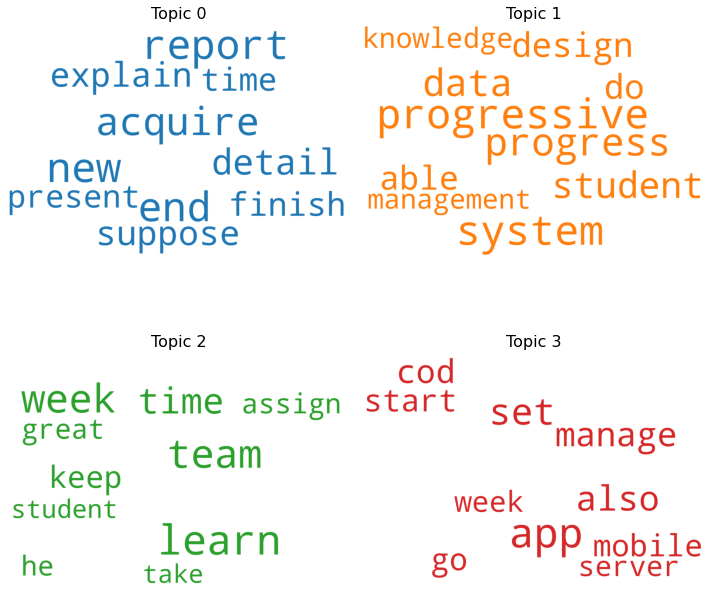

In [73]:
get_wordcloud(topic= lda_model)

In [77]:
import functools
from IPython.core.display import display, HTML
from nltk import PorterStemmer

#tell the system how many sentences are needed
max_sentences=10

# function to stem keywords into a common base word
def stem_words(words):
    stemmer = PorterStemmer()
    singles=[]
    for w in words:
        singles.append(stemmer.stem(w))
    return singles

# list of lists for topic words related to this tasks
display(HTML('<h1>What are comments of Field Supervisors about Interns in Categories, Excellent, Good, Neutral, Poor, Very Poor?</h1>'))
tasks = [["excellent"], ["good"],
         ["neutral"],
         ['poor'],["very poor"]]

# loop through the list of lists
for search_words in tasks:
    #str1=''
    # a string of the search words to print readable search
    str1=' '.join(search_words)
    search_words=stem_words(search_words)
    # add excellent to focus the search for comments and avoid unrelated comments
    search_words.append("excellent")
    # search the dataframe for all the keywords
    df1=df[functools.reduce(lambda a, b: a&b, (df['Comment'].str.contains(s) for s in search_words))]
    search_words.pop()

    search_words.append("good")
    # search the dataframe for all the keywords
    df3=df[functools.reduce(lambda a, b: a&b, (df['Comment'].str.contains(s) for s in search_words))]
    search_words.pop()

    search_words.append("poor")
    # search the dataframe for all the keywords
    df4=df[functools.reduce(lambda a, b: a&b, (df['Comment'].str.contains(s) for s in search_words))]
    search_words.pop()

    search_words.append("very poor")
    # search the dataframe for all the keywords
    df5=df[functools.reduce(lambda a, b: a&b, (df['Comment'].str.contains(s) for s in search_words))]
    search_words.pop()

    search_words.append("neutral")
    df2=df[functools.reduce(lambda a, b: a&b, (df['Comment'].str.contains(s) for s in search_words))]
    # remove the neutral word for sentence level analysis
    search_words.pop()
    #combine frames with excellent, good, neutral, poor, and very poor and drop duplicates
    frames = [df1, df2, df3, df4, df5]
    df1a = pd.concat(frames)
    df=df.drop_duplicates()
   
    
    display(HTML('<h3>Task Topic: '+str1+'</h3>'))
    # record how many sentences have been saved for display
    sentences_used=0
    # loop through the result of the dataframe search
    for index, row in df1a.iterrows():
        #break apart the comment to sentence level
        sentences = row['Comment'].split('. ')
        #loop through the sentences of the comment
        for sentence in sentences:
            # missing lets the system know if all the words are in the sentence
            missing=0
            #loop through the words of sentence
            for word in search_words:
                #if keyword missing change missing variable
                if word not in sentence:
                    missing=1
            # after all sentences processed show the sentences not missing keywords limit to max_sentences
            if missing==0 and sentences_used < max_sentences:
                sentences_used=sentences_used+1
              
                display(HTML('<b>'+sentence+'</b> - <i>'+"P"+'</i>'))
print ("done")

C:\Users\Samuel.Kizza\AppData\Local\Temp\ipykernel_34388\1353254813.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


done


In [79]:
New_df = df1a.head()

New_df

,comment_id,Comment,review_clean


Create a Named Entity Recognition (NER) model that takes in a comment as an input and outputs the Entities, if any, belonging to the categories: Person, Organization, Place/Location, Time 

In [84]:
#importing necessary libraries 
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")  #creating an object and loading the pre-trained model for "English" 

In [85]:
sentence = "Apple is looking at buying U.K. startup for $1 billion"
  
doc = nlp(sentence)
  
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


In [86]:
for ent in doc.ents:
  print(ent.text,"|", ent.label_)

Apple | ORG
U.K. | GPE
$1 billion | MONEY
